In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def plot_p(pf_df, pwr_df, sim_df):
    """
    Plots active power (P) in kW from PowerFactory, PowerDynamics, and Simulink in a 3x1 subplot layout.
    Includes vertical lines at 11.5s and 12s for event markers.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 6))
    fig.suptitle('Active Power Comparison (P)', fontsize=16)

    event_times = [11.5, 12]
    line_style = {'color': 'red', 'linestyle': '--', 'linewidth': 1}

    # PowerFactory
    axs[0].plot(pf_df['time'], pf_df['p_kw'], color='tab:blue')
    axs[0].set_title('PowerFactory')
    axs[0].set_ylabel('P [kW]')
    axs[0].set_xlabel('Time [s]')
    axs[0].grid(True)
    for t in event_times:
        axs[0].axvline(x=t, **line_style)

    # PowerDynamics
    axs[1].plot(pwr_df['time'], pwr_df['p_kw'], color='tab:green')
    axs[1].set_title('PowerDynamics')
    axs[1].set_ylabel('P [kW]')
    axs[1].set_xlabel('Time [s]')
    axs[1].grid(True)
    for t in event_times:
        axs[1].axvline(x=t, **line_style)

    # Simulink
    axs[2].plot(sim_df['time'], sim_df['p_kw'], color='tab:orange')
    axs[2].set_title('Simulink')
    axs[2].set_ylabel('P [kW]')
    axs[2].set_xlabel('Time [s]')
    axs[2].grid(True)
    for t in event_times:
        axs[2].axvline(x=t, **line_style)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=2.0)
    plt.show()


In [52]:
def plot_vabc(pf_df, pwr_df, sim_df):
    """
    Plots three-phase voltage (Vabc) from PowerFactory, PowerDynamics, and Simulink in a 3x1 layout.
    Includes vertical event lines at 11.5s and 12s.
    """
    fig, axs = plt.subplots(3, 1, figsize=(10, 6))
    fig.suptitle('Three-Phase Voltage Comparison (Vabc)', fontsize=16)

    event_times = [11.5, 12]
    line_style = {'color': 'red', 'linestyle': '--', 'linewidth': 1}

    # PowerFactory
    axs[0].plot(pf_df['time'], pf_df['v_a'], label='Va', color='tab:blue')
    axs[0].plot(pf_df['time'], pf_df['v_b'], label='Vb', color='tab:green')
    axs[0].plot(pf_df['time'], pf_df['v_c'], label='Vc', color='tab:orange')
    axs[0].set_title('PowerFactory')
    axs[0].set_ylabel('V pu')
    axs[0].set_xlabel('Time [s]')
    axs[0].grid(True)
    for t in event_times:
        axs[0].axvline(x=t, **line_style)

    # PowerDynamics
    axs[1].plot(pwr_df['time'], pwr_df['v'], label='Va', color='tab:blue')
    axs[1].set_title('PowerDynamics')
    axs[1].set_ylabel('V pu')
    axs[1].set_xlabel('Time [s]')
    axs[1].grid(True)
    for t in event_times:
        axs[1].axvline(x=t, **line_style)

    # Simulink
    axs[2].plot(sim_df['time'], sim_df['v_a'], label='Va', color='tab:blue')
    axs[2].plot(sim_df['time'], sim_df['v_b'], label='Vb', color='tab:green')
    axs[2].plot(sim_df['time'], sim_df['v_c'], label='Vc', color='tab:orange')
    axs[2].set_title('Simulink')
    axs[2].set_ylabel('V pu')
    axs[2].set_xlabel('Time [s]')
    axs[2].grid(True)
    for t in event_times:
        axs[2].axvline(x=t, **line_style)

    # Only add legend once (or adjust as needed)
    axs[0].legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=2.0)
    plt.show()


In [58]:
import matplotlib.pyplot as plt

def plot_iabc(pf_df, sim_df):
    """
    Plots three-phase current (Iabc) from PowerFactory and Simulink in a 2x1 layout.
    Includes vertical event lines at 11.5s and 12s.
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 5))
    fig.suptitle('Three-Phase Current Comparison (Iabc)', fontsize=16)

    event_times = [11.5, 12]
    line_style = {'color': 'red', 'linestyle': '--', 'linewidth': 1}

    # PowerFactory
    axs[0].plot(pf_df['time'], pf_df['i_a_pu'], label='Ia', color='tab:blue')
    axs[0].plot(pf_df['time'], pf_df['i_b_pu'], label='Ib', color='tab:green')
    axs[0].plot(pf_df['time'], pf_df['i_c_pu'], label='Ic', color='tab:orange')
    axs[0].set_title('PowerFactory')
    axs[0].set_ylabel('I pu')
    axs[0].grid(True)
    for t in event_times:
        axs[0].axvline(x=t, **line_style)

    # Simulink
    axs[1].plot(sim_df['time'], sim_df['i_a'], label='Ia', color='tab:blue')
    axs[1].plot(sim_df['time'], sim_df['i_b'], label='Ib', color='tab:green')
    axs[1].plot(sim_df['time'], sim_df['i_c'], label='Ic', color='tab:orange')
    axs[1].set_title('Simulink')
    axs[1].set_ylabel('I pu')
    axs[1].set_xlabel('Time [s]')
    axs[1].grid(True)
    for t in event_times:
        axs[1].axvline(x=t, **line_style)

    axs[0].legend(loc='upper right')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=2.0)
    plt.show()


In [47]:
# Load trimmed data
pf_all = pd.read_csv('Data/Cleaned/pf_all.csv')
pwr_all = pd.read_csv('Data/Cleaned/pwr_all.csv')
simulink_all = pd.read_csv('Data/Cleaned/simulink_all.csv')

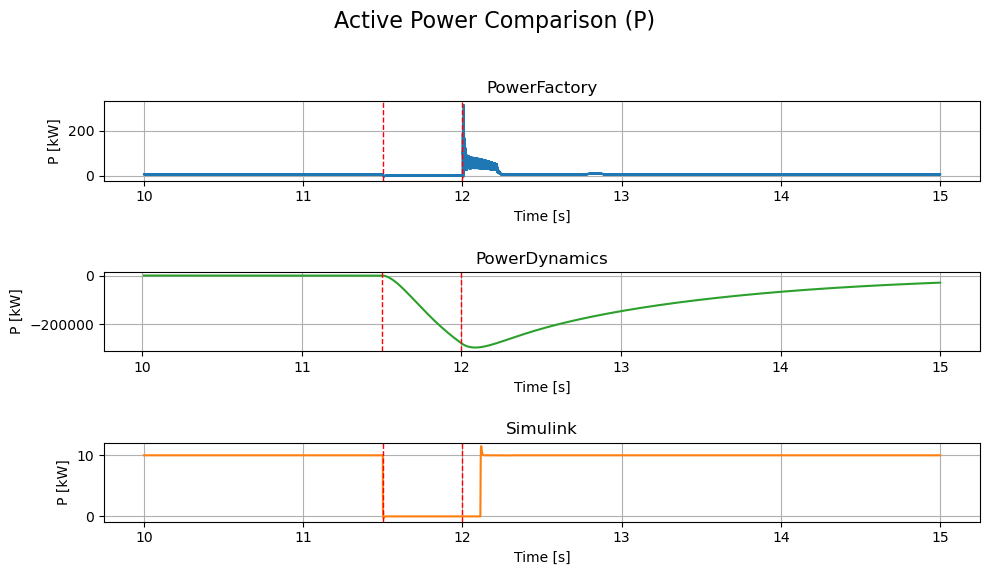

In [48]:
plot_p(pf_all, pwr_all, simulink_all)

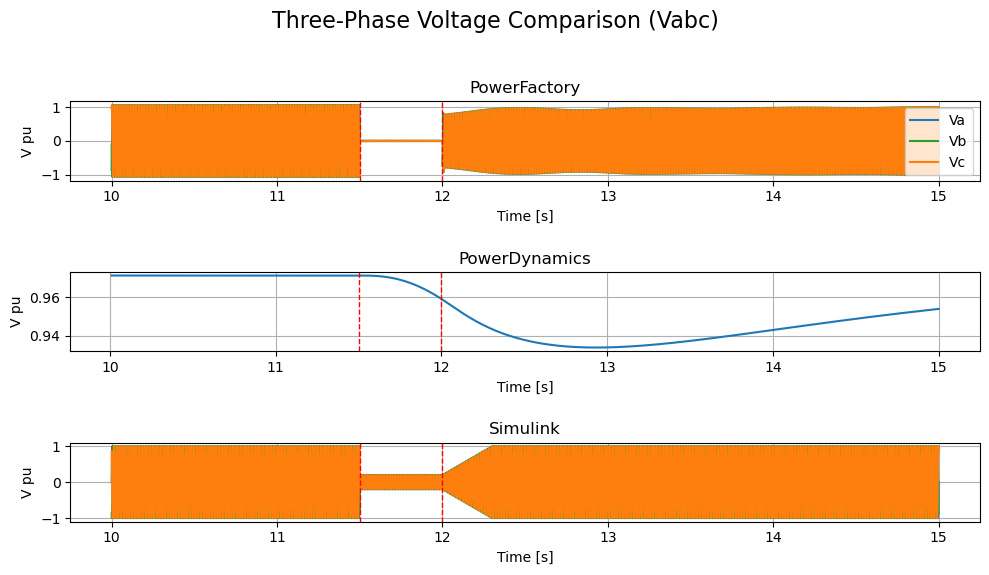

In [53]:
plot_vabc(pf_all, pwr_all, simulink_all)


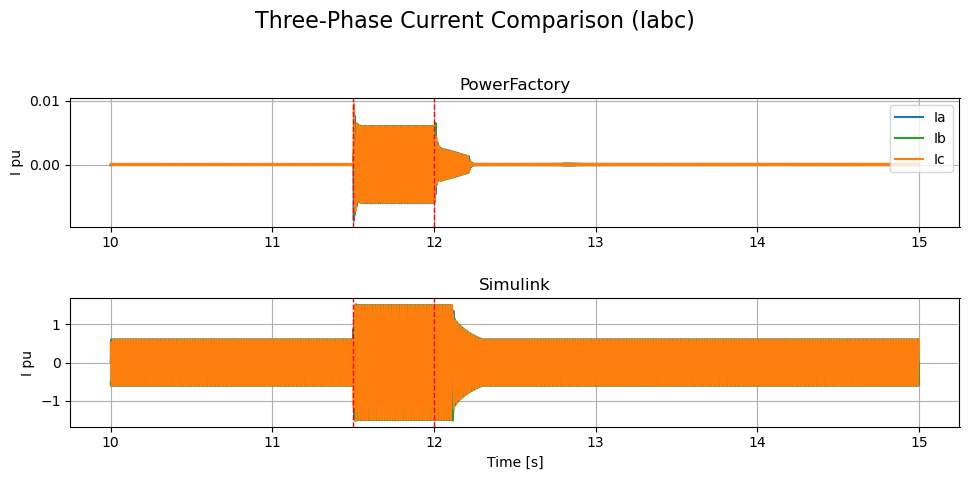

In [59]:
plot_iabc(pf_all, simulink_all)
